# Data Pre-processing 

Nama : Hendry Setiawan 

NIM : 2602103356

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_C.csv',index_col=['id'])
df.head()

,Unnamed: 0,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
id,,,,,,,,,,,,,,
157138,0,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
116144,1,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
145603,2,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
79929,3,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
52554,4,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41258 entries, 157138 to 154294
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   CustomerId       41258 non-null  int64  
 2   Surname          41258 non-null  object 
 3   CreditScore      41246 non-null  float64
 4   Geography        41258 non-null  object 
 5   Gender           41258 non-null  object 
 6   Age              41258 non-null  float64
 7   Tenure           41258 non-null  int64  
 8   Balance          41258 non-null  float64
 9   NumOfProducts    41258 non-null  int64  
 10  HasCrCard        41258 non-null  int64  
 11  IsActiveMember   41258 non-null  int64  
 12  EstimatedSalary  41258 non-null  float64
 13  churn            41258 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 4.7+ MB


In [3]:
df.isna().sum()

Unnamed: 0          0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >]], dtype=object)

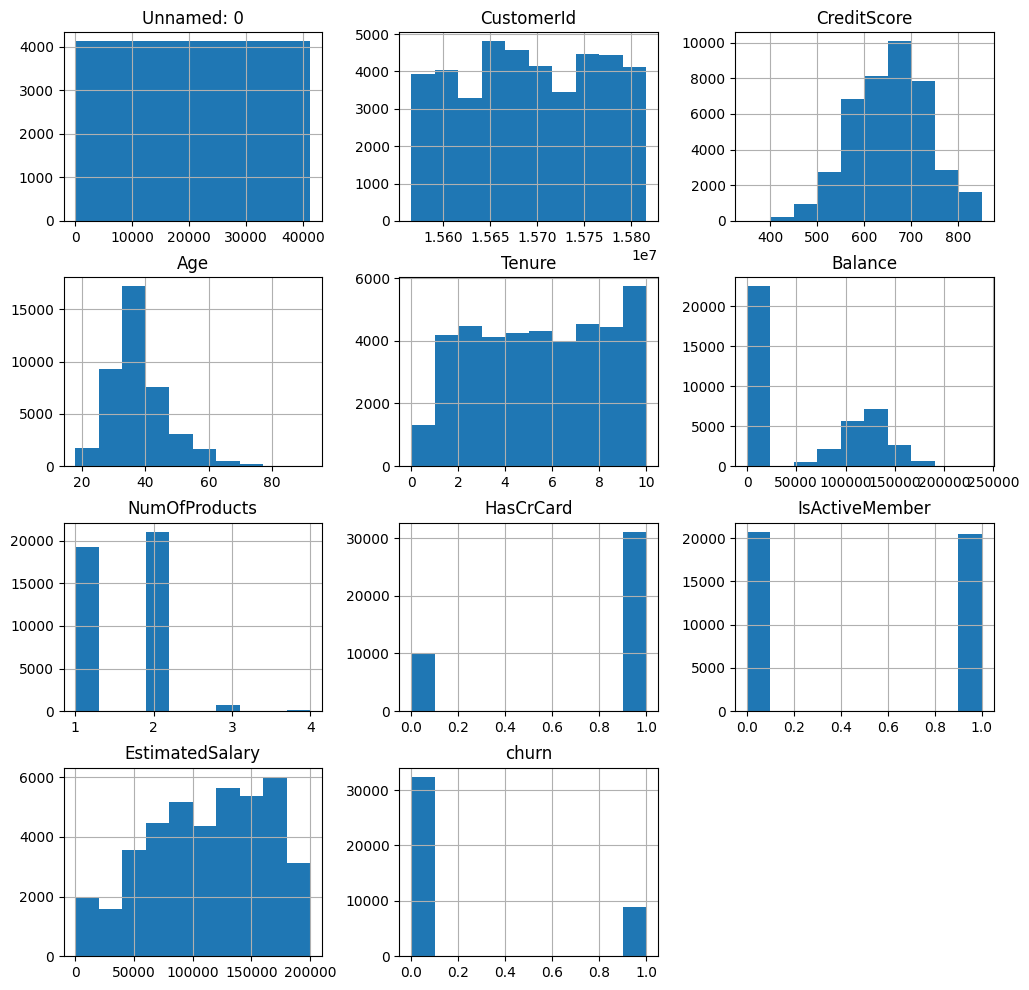

In [4]:
df.hist(figsize=(12,12))

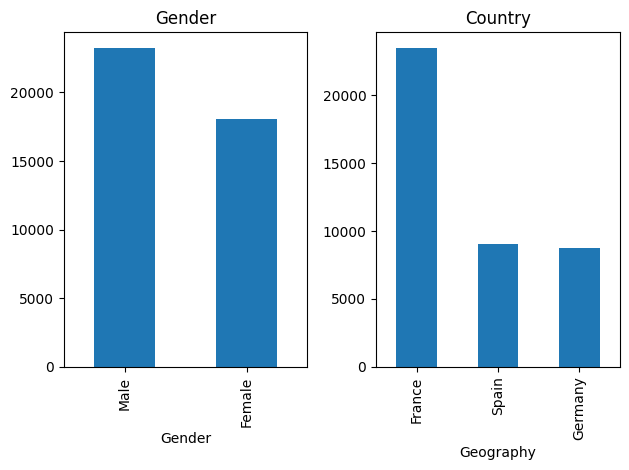

In [5]:
fig,axes = plt.subplots(1,2)
df['Gender'].value_counts().plot(kind = 'bar',ax = axes[0],title = 'Gender')
df['Geography'].value_counts().plot(kind = 'bar',ax = axes[1],title = 'Country')
fig.tight_layout()

In [6]:
df.describe()

,Unnamed: 0,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41258.00000,4.125800e+04,41246.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000,41258.000000
mean,20628.50000,1.569218e+07,655.802890,38.165611,5.036308,55308.965471,1.556038,0.754011,0.496776,112507.486040,0.214455
std,11910.30304,7.136319e+04,79.736298,8.947665,2.817831,62795.530950,0.548029,0.430677,0.499996,50048.666663,0.410449
min,0.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.25000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,20628.50000,1.569070e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117616.290000,0.000000
75%,30942.75000,1.575662e+07,710.000000,42.750000,7.000000,119785.395000,2.000000,1.000000,1.000000,154700.647500,0.000000
max,41257.00000,1.581569e+07,850.000000,92.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: >

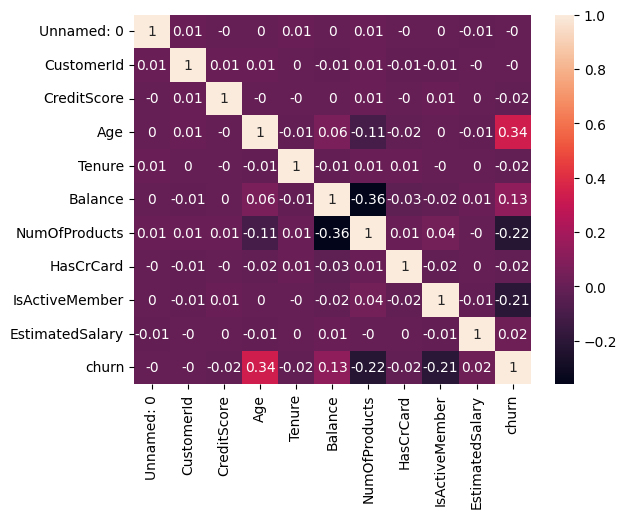

In [7]:
sns.heatmap(df.corr(numeric_only=True).round(2),annot = True)

## Data Cleaning 

### Feature Engineering

In [8]:
#mengisi data yang kosong pada credit score
df['CreditScore'] = df['CreditScore'].fillna(df['CreditScore'].mean())

In [9]:
#menghapus kolom data yang tidak dibutuhkan 
df = df.drop(columns=['Unnamed: 0','CustomerId','Surname'])

In [10]:
#feature encoding pada kolom Gender 
df['Gender'] = df['Gender'].apply(lambda x : x == 'Male')


In [11]:
#one hot encoding pada kolom Geography 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
df = pd.concat([df,encoder.fit_transform(df[['Geography']])],axis = 1).drop(columns='Geography')

### Feature selection

In [12]:
#feature selection pada 
from sklearn.feature_selection import f_classif,GenericUnivariateSelect

x = df.drop(columns = ['churn'])
y = df['churn']

transformer = GenericUnivariateSelect(f_classif,mode = 'percentile',param = 75).set_output(transform='pandas')
X_new = transformer.fit_transform(x, y)

In [13]:
print('selected columns : ',X_new.columns.to_list())

selected columns :  ['CreditScore', 'Gender', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain']


### Train and Test Split Data

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_new,y,test_size=0.15)

### Oversampling with ADASYN

In [15]:
from imblearn.over_sampling import ADASYN

oversampling = ADASYN()

x_train, y_train = oversampling.fit_resample(x_train, y_train)

## Modeling

### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
from sklearn.metrics import classification_report

y_pred_rf = rfc.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4850
           1       0.61      0.58      0.60      1339

    accuracy                           0.83      6189
   macro avg       0.75      0.74      0.74      6189
weighted avg       0.83      0.83      0.83      6189



### XGBoost

In [18]:
import xgboost as xgb

xg = xgb.XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
y_pred_xgb = xg.predict(x_test)
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4850
           1       0.66      0.63      0.64      1339

    accuracy                           0.85      6189
   macro avg       0.78      0.77      0.77      6189
weighted avg       0.85      0.85      0.85      6189



### Export to pickle

In [20]:
import pickle 

filename_model = 'xgboost.pkl'
pickle.dump(xg, open(filename_model, 'wb'))

In [21]:
filename_encoder = 'one_hot_encoder.pkl'
pickle.dump(encoder, open(filename_encoder, 'wb'))